In [127]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [128]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [129]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [130]:
# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [131]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [132]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
#Check the shape of dataframe
data.shape

(506, 14)

In [122]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [ ]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


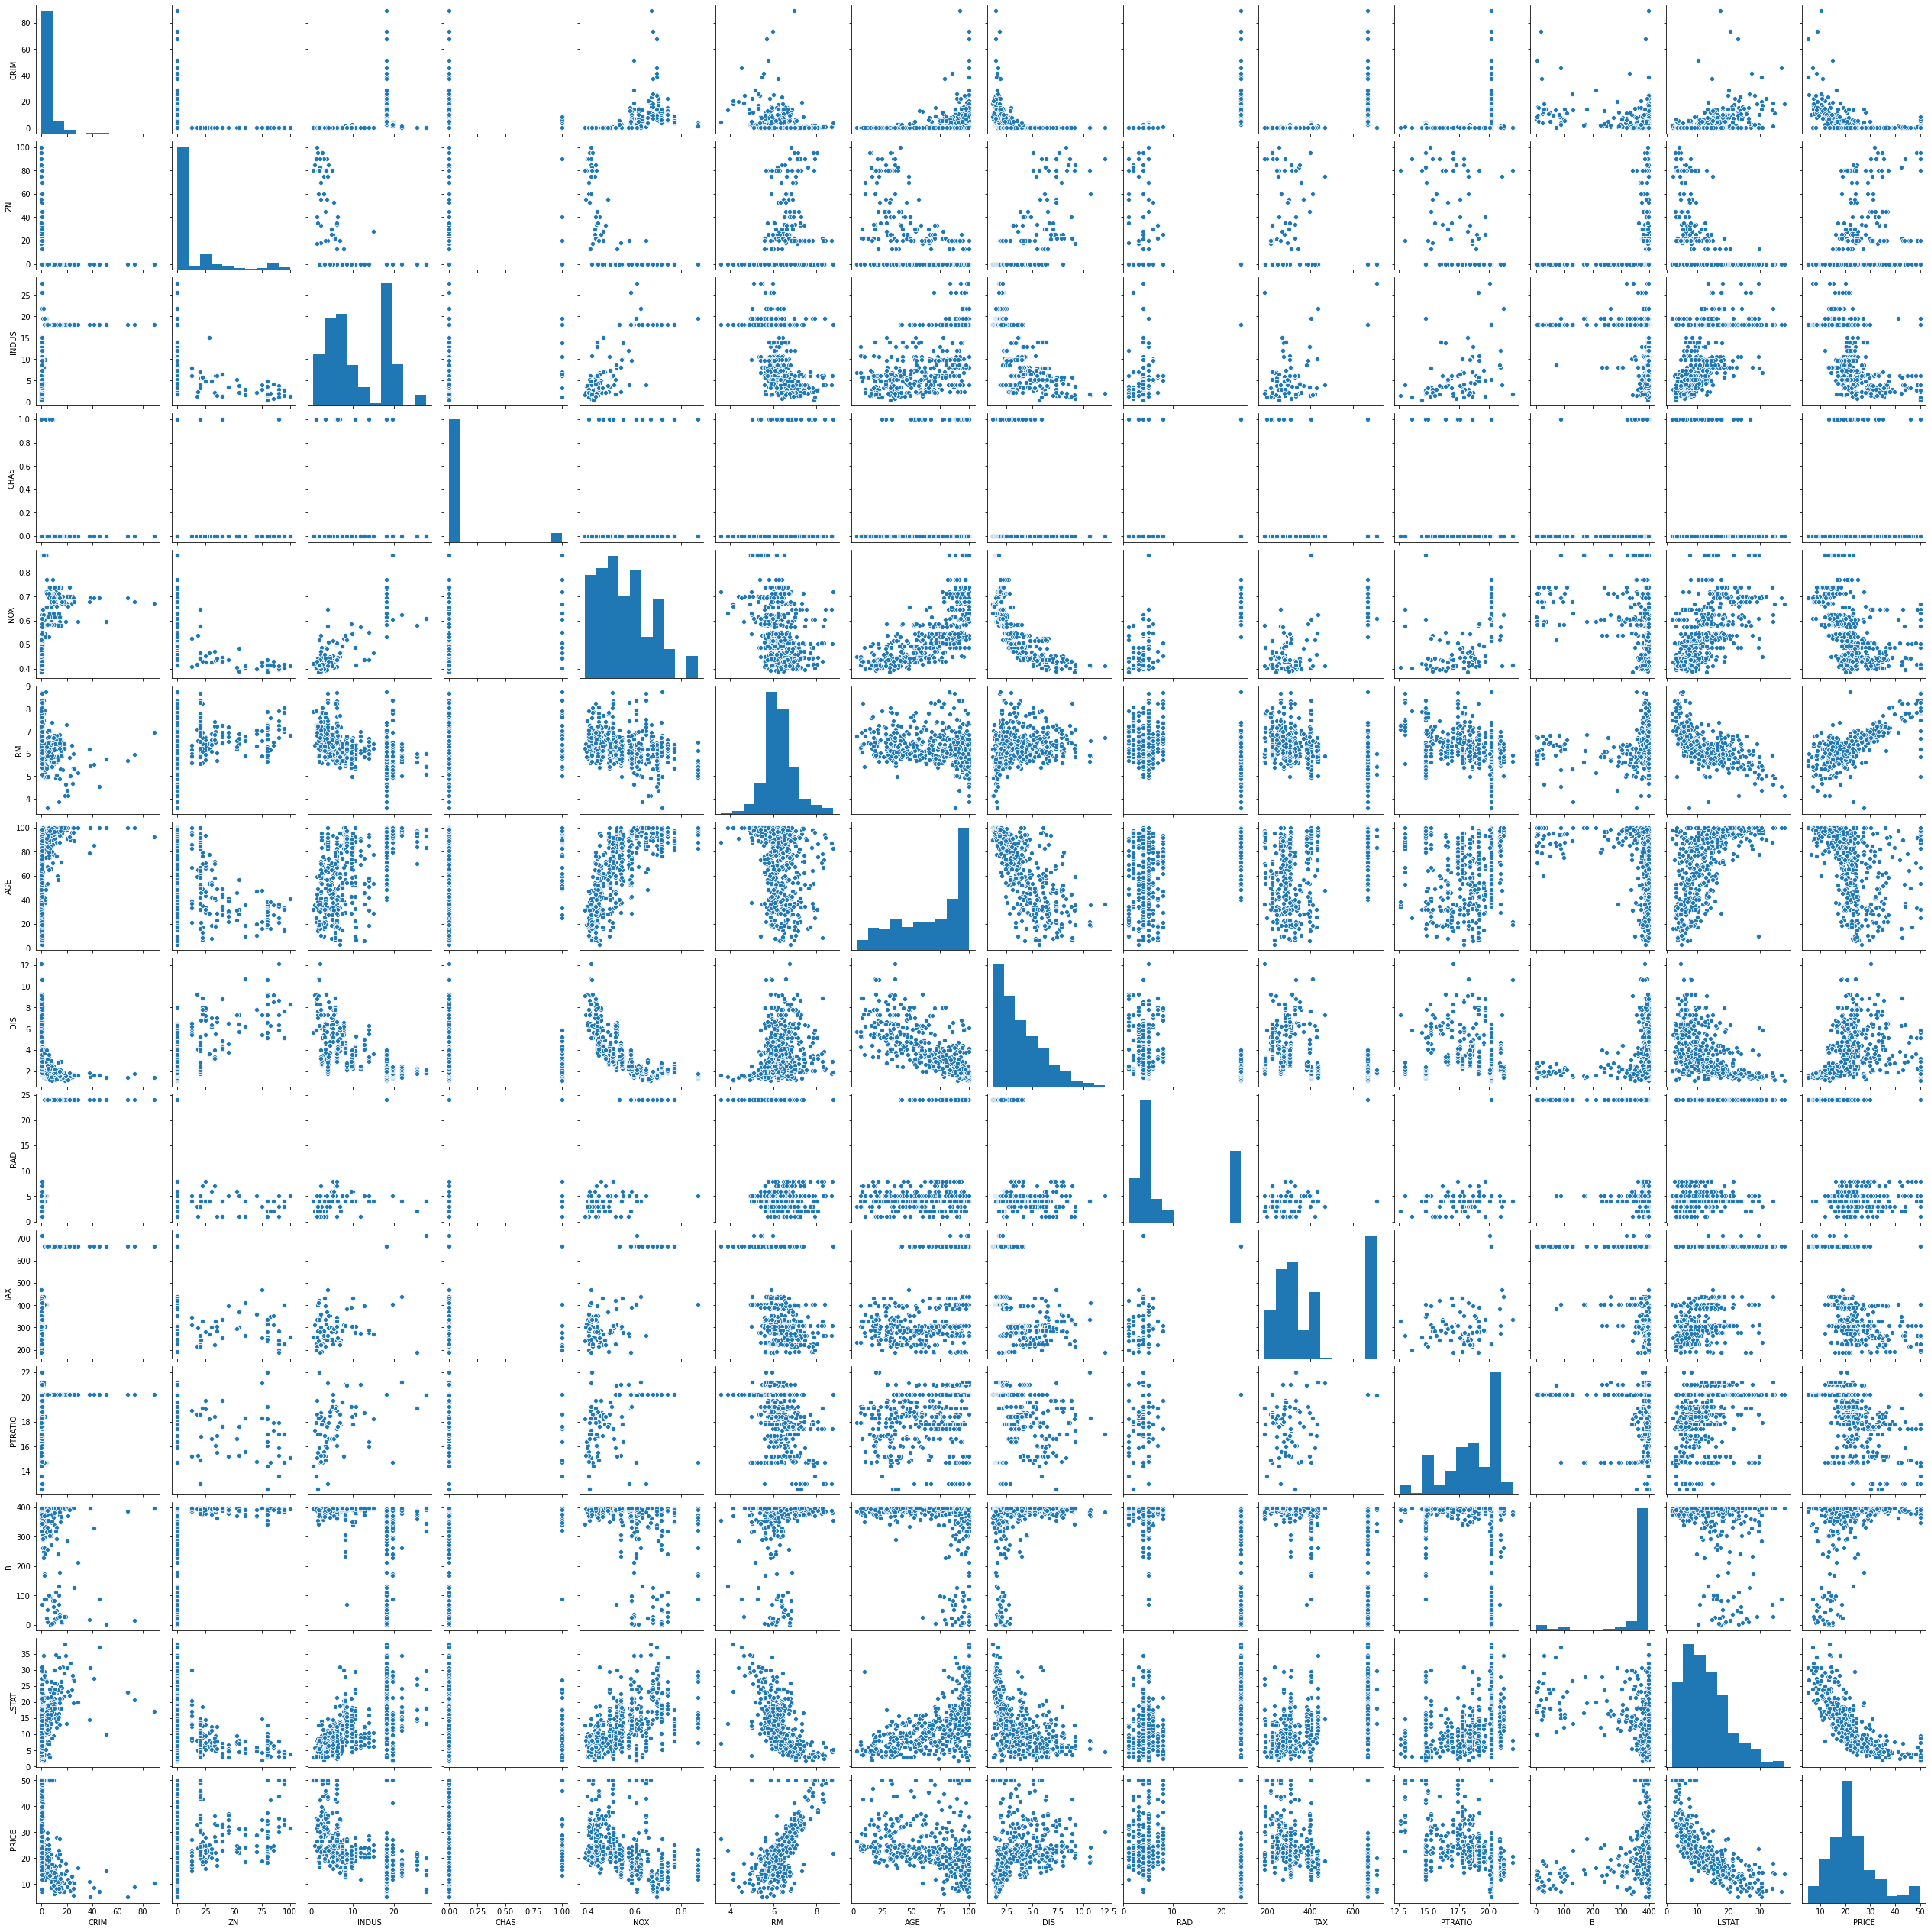

In [ ]:
sns.pairplot(data)

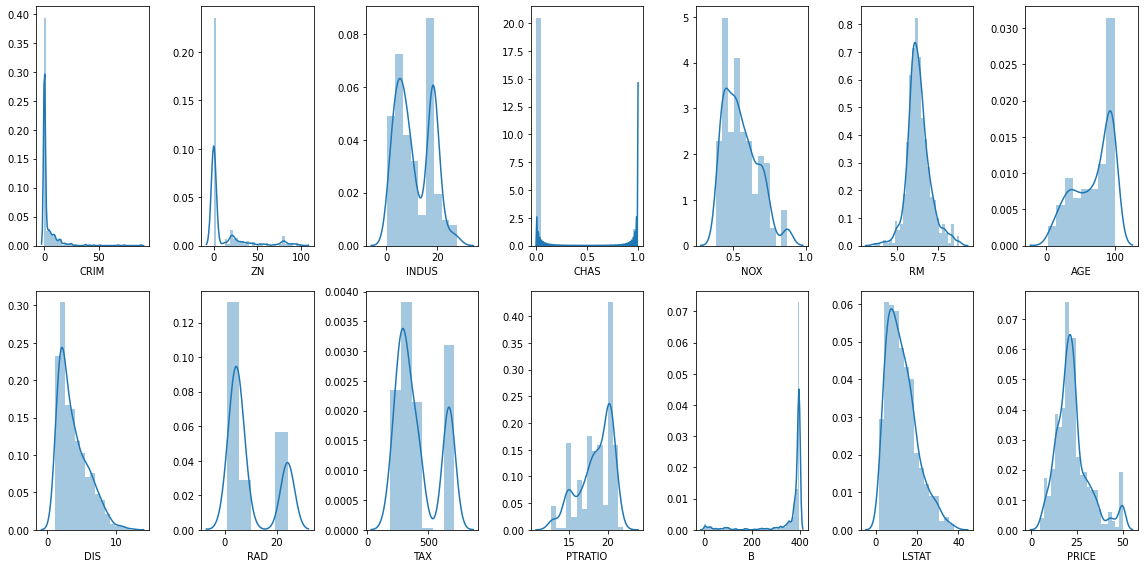

In [123]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))

col=data.columns
index=0
for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]],ax=ax[i][j])
    index=index+1
plt.tight_layout()

In [124]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable])

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    

    plt.show()

Optimal lambda:  -0.9538972370743762


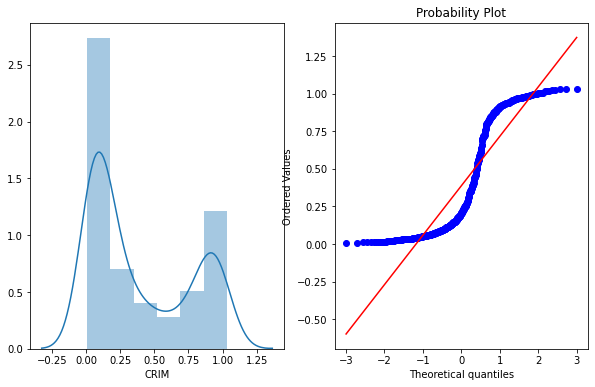

Optimal lambda:  -0.9052980279159538


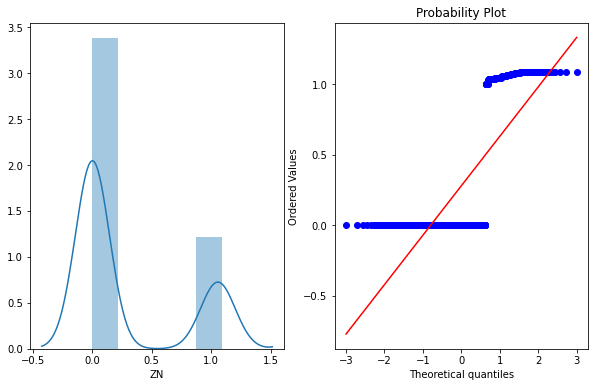

Optimal lambda:  0.37915189559193174


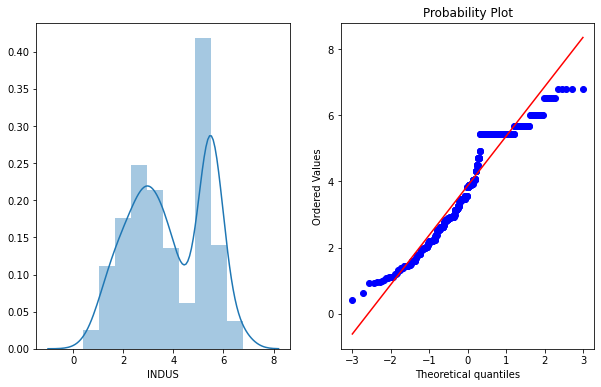

Optimal lambda:  -20.857089856991017


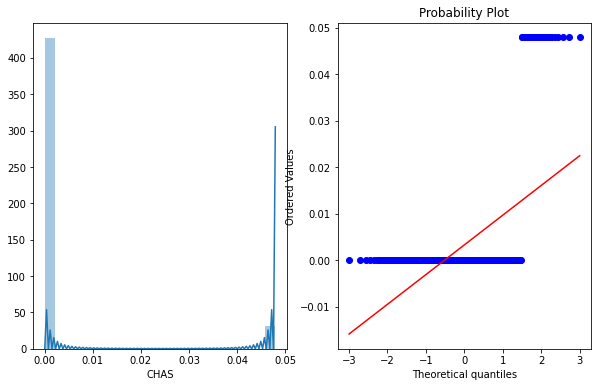

Optimal lambda:  -3.973711110790067


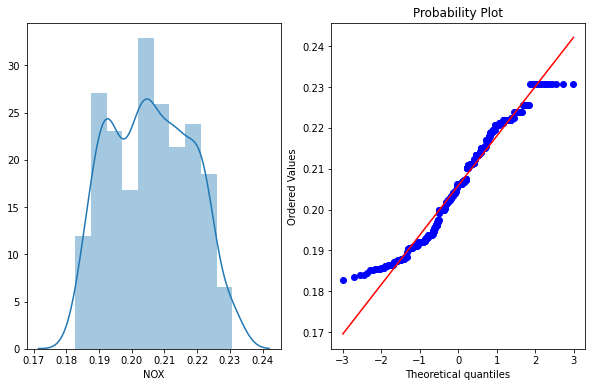

Optimal lambda:  0.33298652154357894


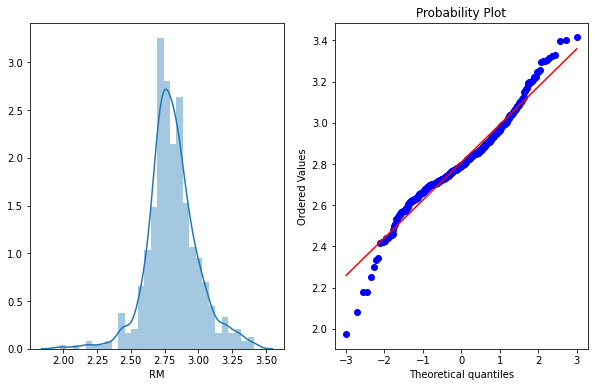

Optimal lambda:  1.36614007643626


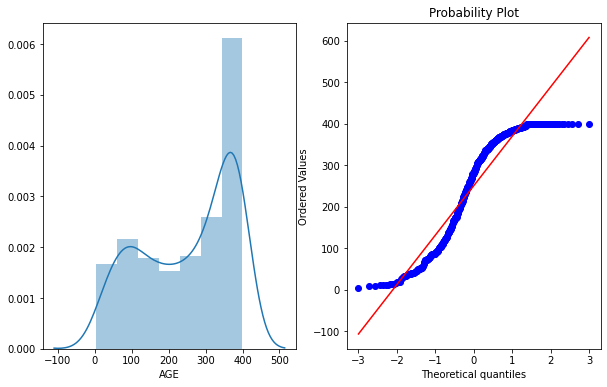

Optimal lambda:  -0.4488719212889845


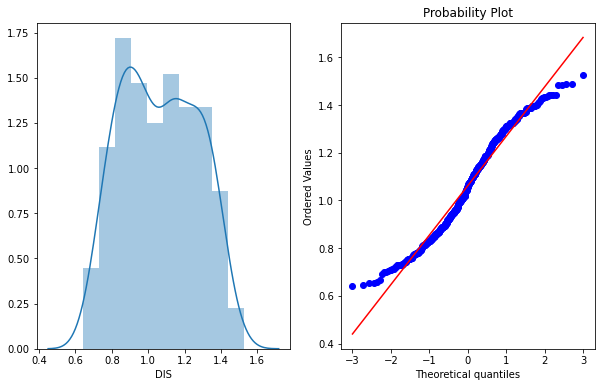

Optimal lambda:  -0.373678392795355


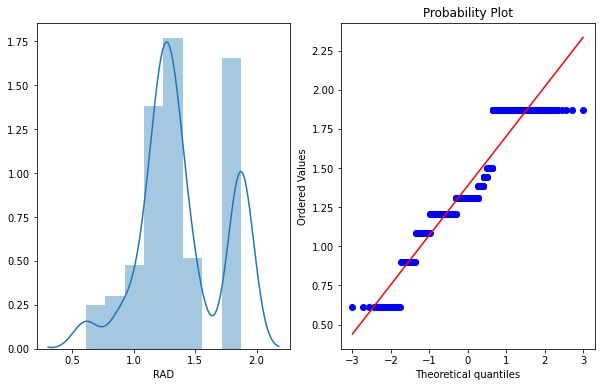

Optimal lambda:  -0.5291764927619569


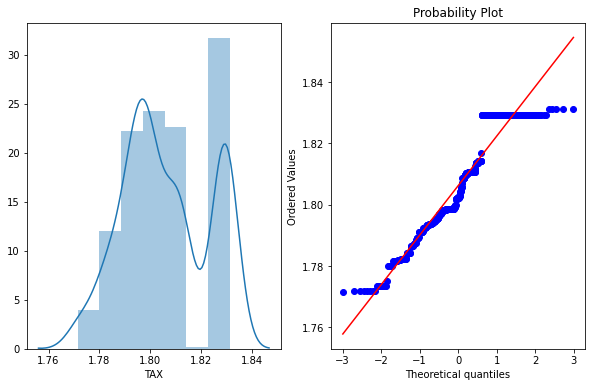

Optimal lambda:  4.557703922205493


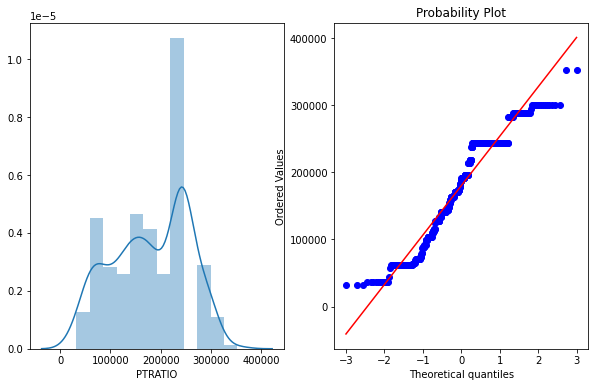

Optimal lambda:  3.778133976567779


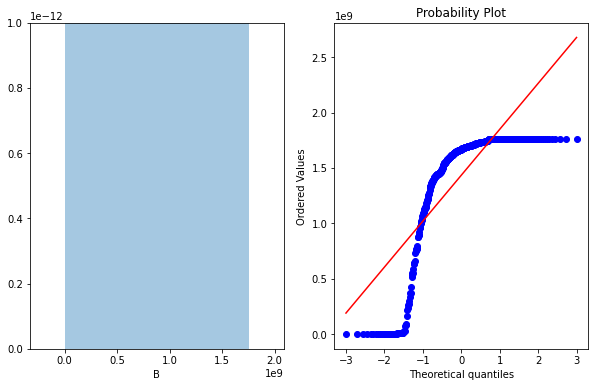

Optimal lambda:  0.15370551424374376


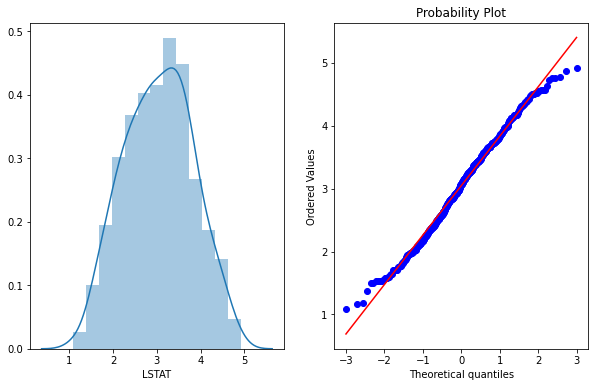

Optimal lambda:  0.17025031232006213


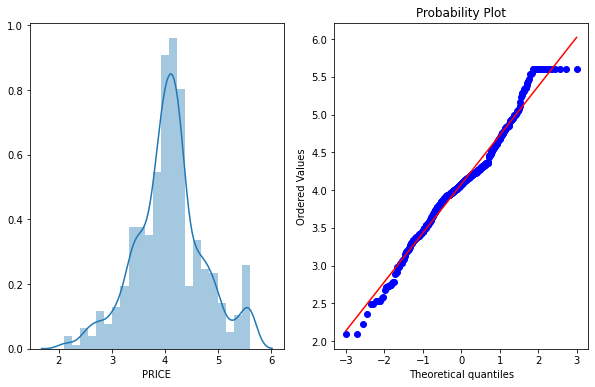

In [125]:
for i in data.columns:

  #data[i]=np.log(data[i]+1)
  #diagnostic_plots(data,i)
  
  data[i], param = stats.boxcox(data[i]+1) # you can vary the exponent as needed
  print('Optimal lambda: ', param)
  diagnostic_plots(data,i)

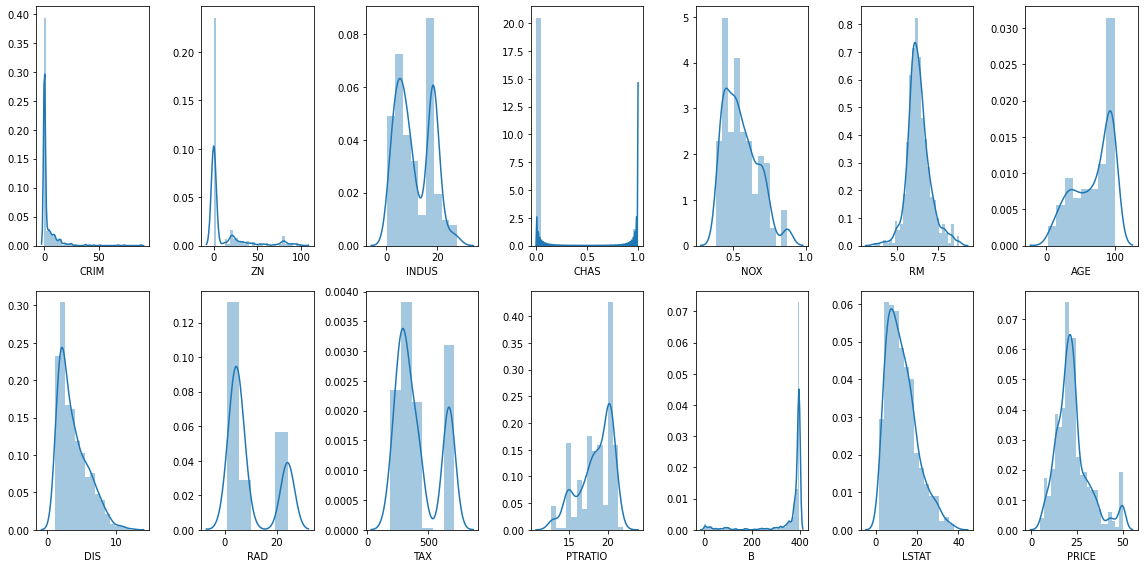

In [133]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))

col=data.columns
index=0
for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]],ax=ax[i][j])
    index=index+1
plt.tight_layout()

In [134]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
#Check the shape of dataframe
data.shape

(506, 14)

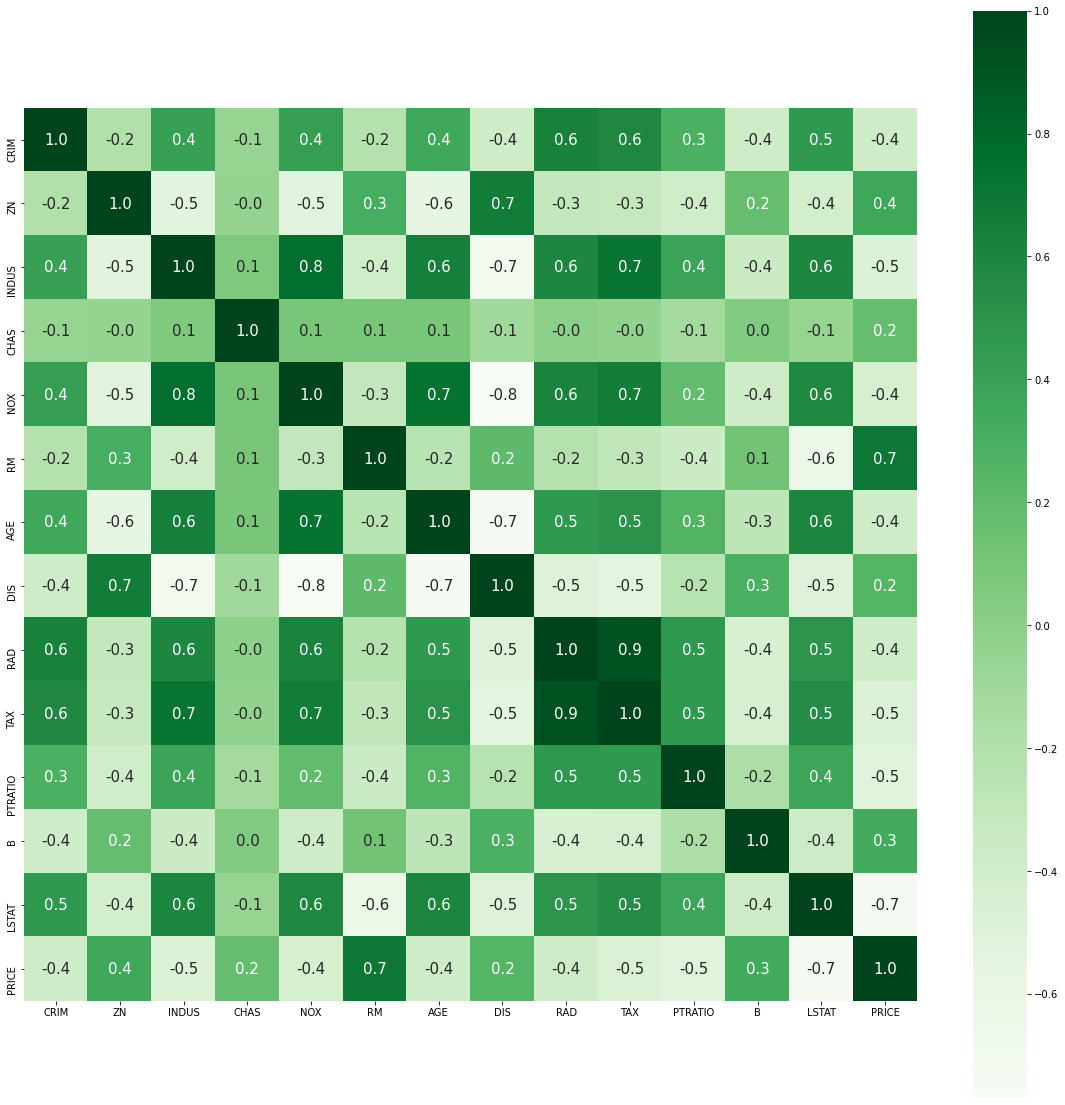

In [135]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


In [136]:
#Anomaly Detection
to_model_columns=data.columns
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(data)
pred = clf.predict(data)
data['anomaly']=pred
outliers=data.loc[data['anomaly']==-1]
outlier_index=list(outliers.index)
print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data['anomaly'].value_counts())

[126, 142, 144, 145, 146, 152, 154, 155, 156, 160, 161, 162, 163, 166, 195, 196, 197, 200, 202, 203, 204, 253, 257, 262, 267, 273, 282, 283, 286, 353, 354, 355, 356, 357, 358, 363, 364, 365, 367, 368, 369, 370, 372, 374, 380, 384, 404, 405, 409, 410, 411, 412, 413, 414, 418, 419, 426, 427, 438, 489, 490]
 1    445
-1     61
Name: anomaly, dtype: int64


In [137]:
data2=data.drop(data.index[[outlier_index]])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [138]:
data2.shape

(445, 15)

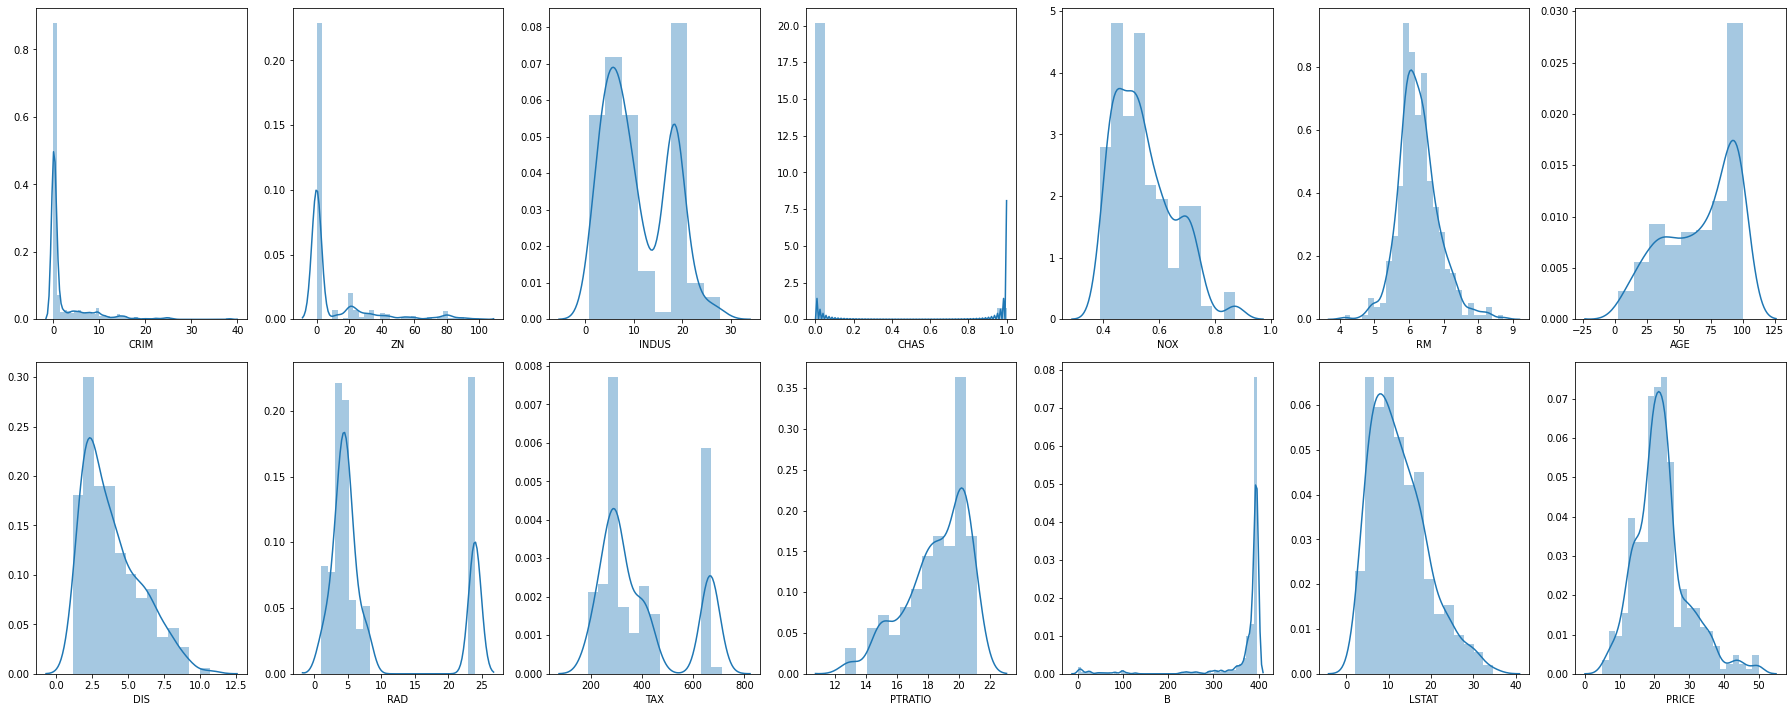

In [139]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(25,10))

col=data2.columns
index=0
for i in range(rows):
  for j in range(cols):
    sns.distplot(data2[col[index]],ax=ax[i][j])
    index=index+1
plt.tight_layout()

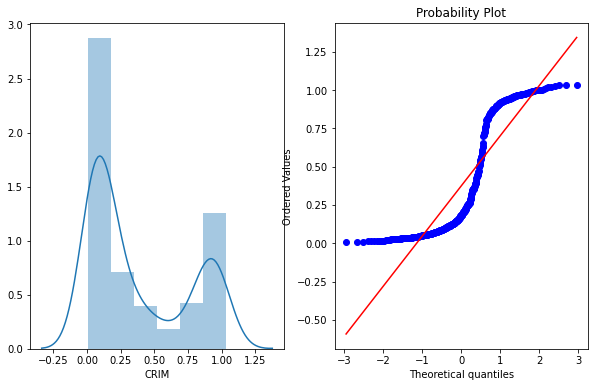

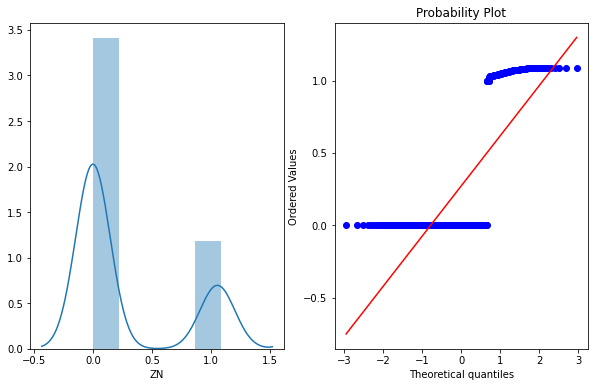

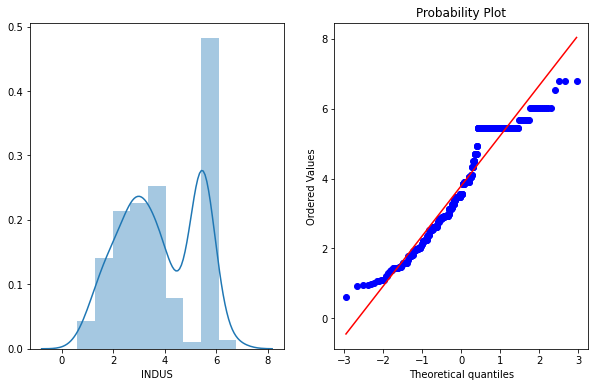

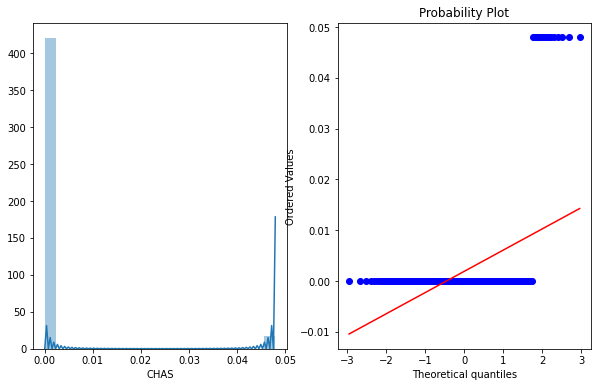

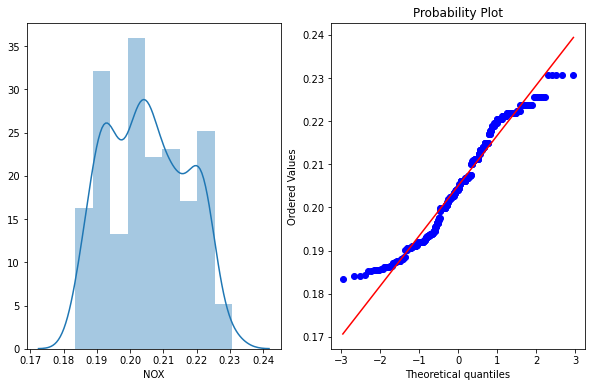

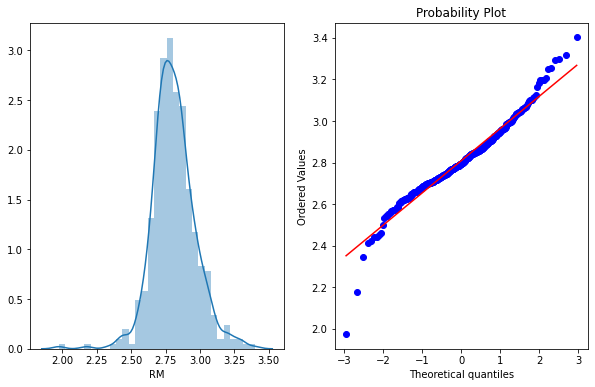

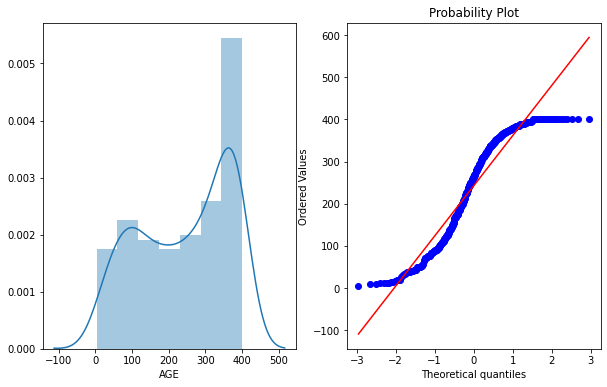

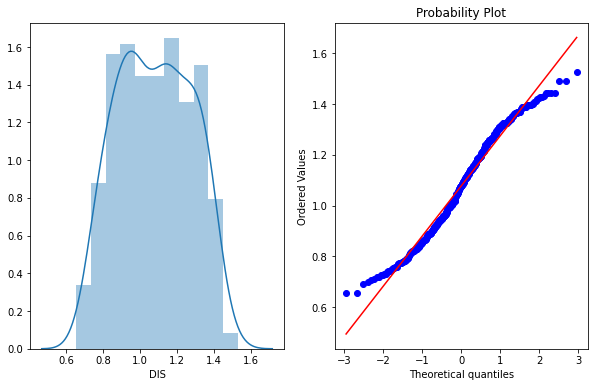

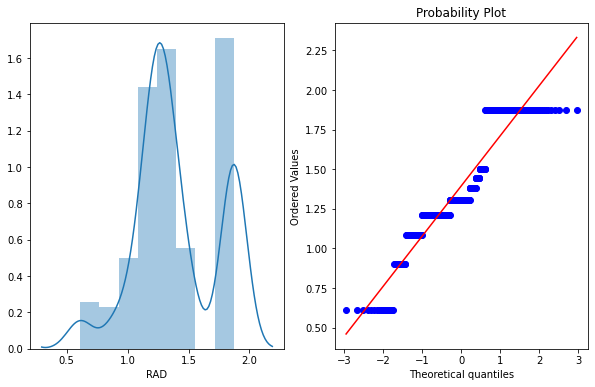

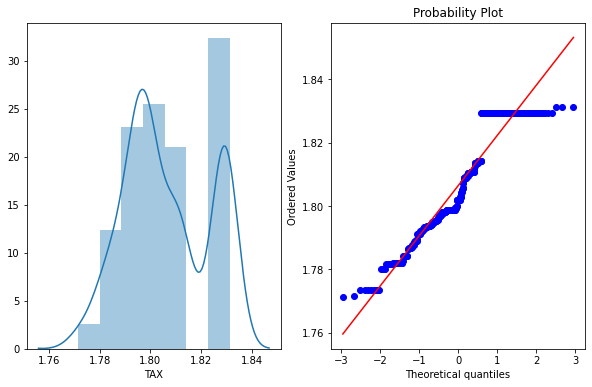

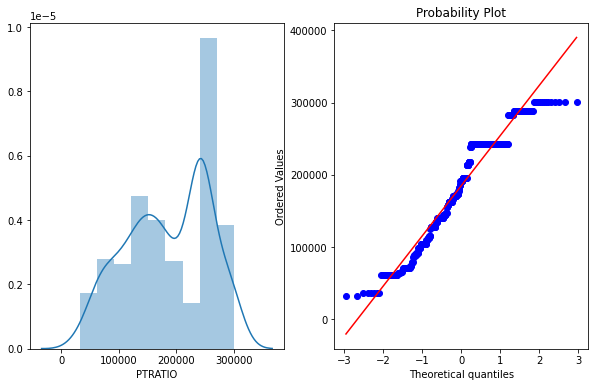

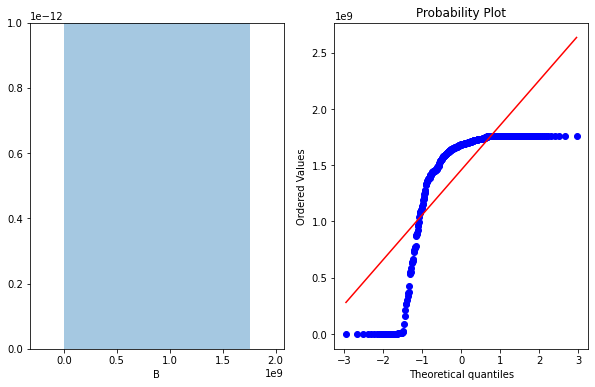

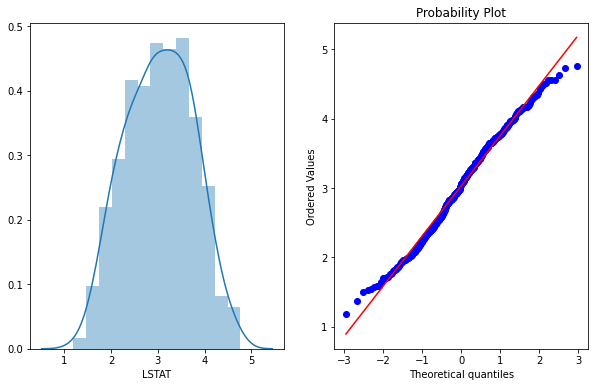

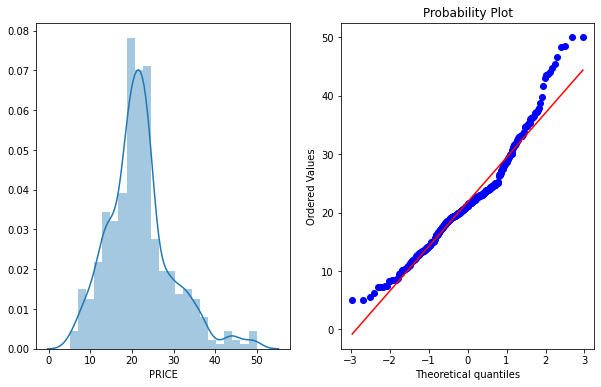

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


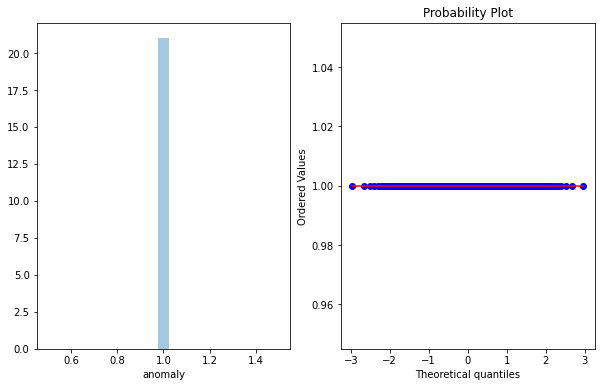

In [ ]:
for i in data2.columns:

  #data[i]=np.log(data[i]+1)
  #diagnostic_plots(data,i)
  
  #data2[i], param = stats.boxcox(data2[i]+1) # you can vary the exponent as needed
  #print('Optimal lambda: ', param)
  diagnostic_plots(data2,i)

In [140]:
data3=data2.copy()
data2.columns
del data2['PRICE']
del data2['anomaly']

In [141]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

data4=trimm_correlated(data2,0.8)   

In [142]:
data4

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [143]:
data4['PRICE']=data3.PRICE
data4
y=data4['PRICE']
X=data4.iloc[:,0:11]

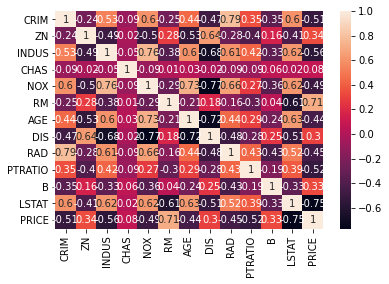

In [144]:
correlation_matrix = data4.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

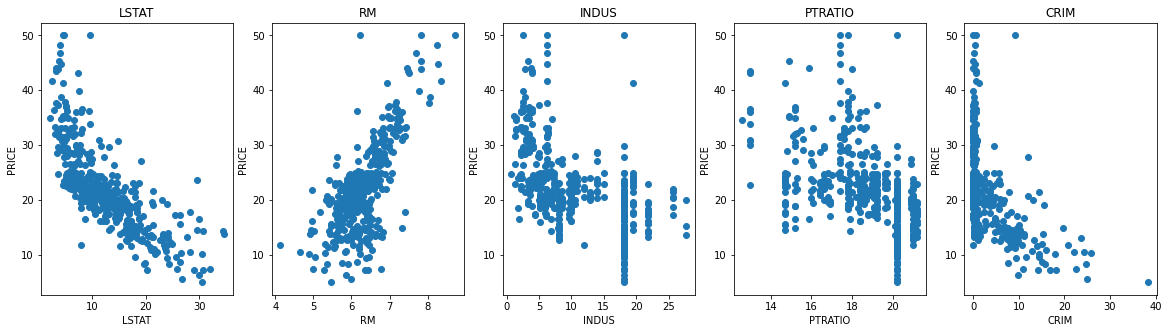

In [145]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','INDUS','PTRATIO','CRIM']
target = data4['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data4[col]
    y = target
    plt.scatter(x, y, marker='o')
    
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

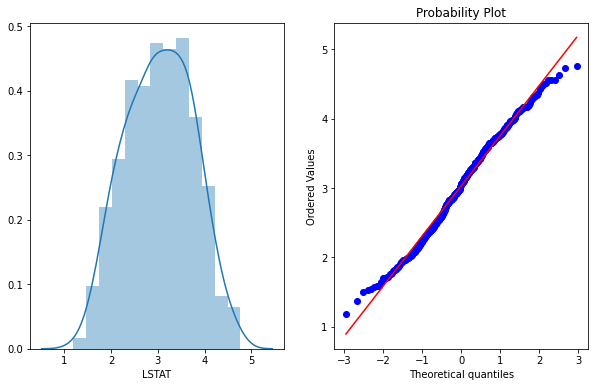

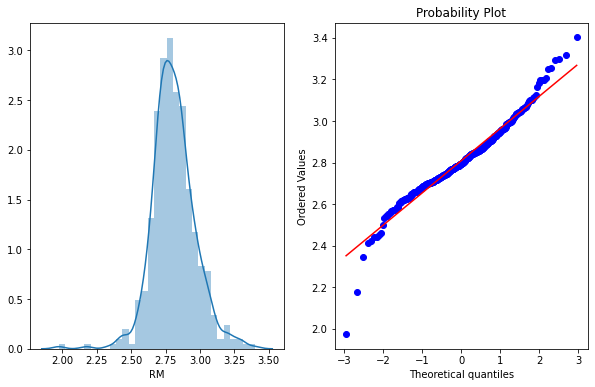

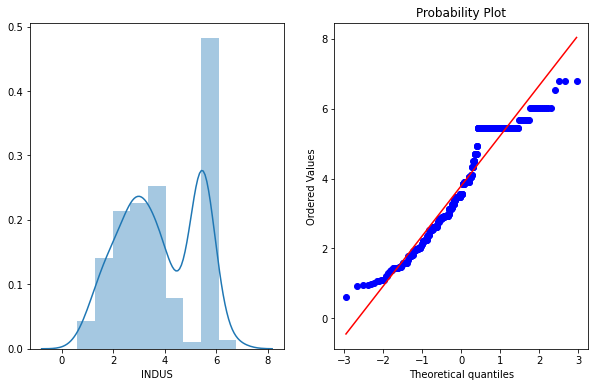

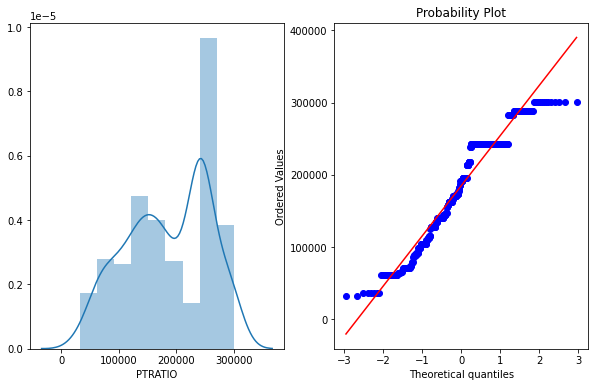

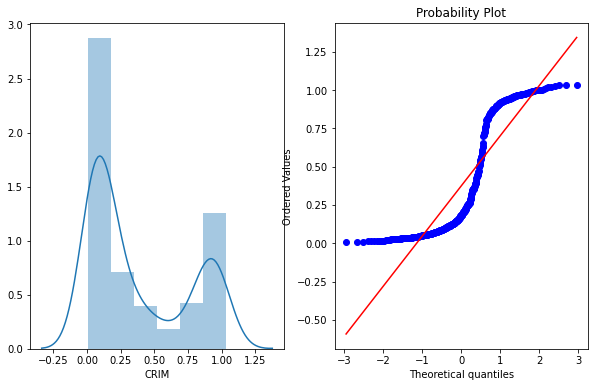

In [ ]:

features = ['LSTAT', 'RM','INDUS','PTRATIO','CRIM']
for i in features:

  
  diagnostic_plots(data4,i)


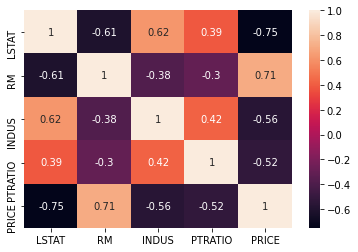

In [146]:
features = ['LSTAT', 'RM','INDUS','PTRATIO','PRICE']
correlation_matrix = data4[features].corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [147]:
X = pd.DataFrame(np.c_[data4['LSTAT'], data4['RM'],data4['INDUS'],data4['PTRATIO']], columns = ['LSTAT','RM','INDUS','PTRATIO'])
Y = data4['PRICE']

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape) 

(356, 4)
(89, 4)
(356,)
(89,)


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 3.7160493503665846
R2 score is 0.7518946787765937


The model performance for testing set
--------------------------------------
RMSE is 5.308569346896397
R2 score is 0.5900346338333806


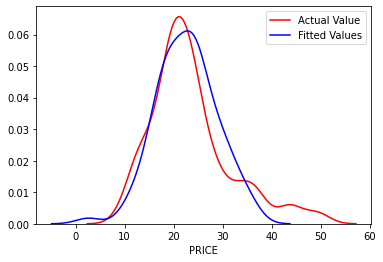

In [151]:
import seaborn as sns

ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

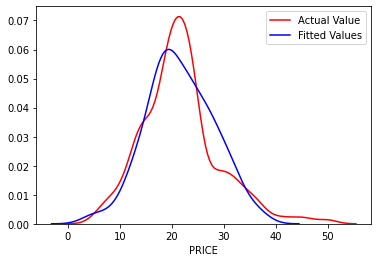

In [152]:
import seaborn as sns

ax1 = sns.distplot(Y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_train_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

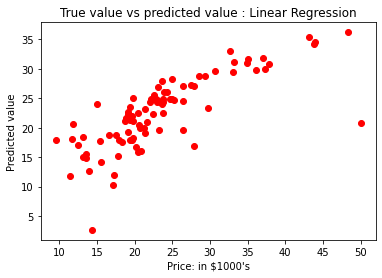

In [153]:
# Plotting Scatter graph to show the prediction 
# results - 'ytrue' value vs 'y_pred' value 
plt.scatter(Y_test, y_test_predict, color= ['red']) 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 


In [154]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lin_model, 'Boston.pkl') 
  
# Load the model from the file 
Boston = joblib.load('Boston.pkl')  
  
# Use the loaded model to make predictions 
Boston.predict(X_test) 

array([23.46271199, 18.73507949, 27.06485405, 18.20613743, 11.80288144,
       20.01794898, 34.2475614 , 14.90672686, 22.56301857, 23.17774321,
       15.58179388, 30.92610695, 18.45563647, 31.64795157, 17.72400803,
       32.98443611, 24.90629316, 12.0118449 , 29.42292802, 23.99377072,
       24.80012636, 28.2270286 , 23.29136699, 25.54759498, 15.01865749,
       24.70791454, 22.37798935, 24.36124532, 19.2435047 , 24.0435329 ,
       24.72294629, 31.90160027, 20.78133416, 29.76601435, 22.39080935,
       17.97720051, 27.97090591, 17.11947795, 15.93124924, 27.14530234,
       17.54836241, 26.96706147, 26.05212321, 31.1974437 , 22.41066193,
       27.20279596, 21.9669218 , 19.56958027, 16.80864823, 24.57994511,
       12.63025675, 25.98060511, 24.33937398, 10.28742684, 15.14645727,
       17.83714865, 20.48889469, 21.24754634, 34.48754282, 18.74930247,
       21.03855132, 21.61285246, 24.84549167, 28.69372974, 30.84868243,
       21.06233246, 24.43532525, 35.32553254, 29.55157591,  2.64

In [115]:
Boston.predict([[56,54,56,56]])

array([424.58569398])

In [156]:
def predict_price(LASAT,RM,INDUS,PTRATIO):
   
    prediction=Boston.predict([[LASAT,RM,INDUS,PTRATIO]])
    return prediction

In [157]:
predict_price(56.8,87.9,9,89.9) 

array([313.75201681])